# Terrorist Activities Around The World
(Insert description about the data and some background context would be good too)

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## 1. Initial Preparation and Visualisation
### 1.1 Preparing the Data

In [23]:
terror=pd.read_csv('globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

# filter the data
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# create a variable to represent number of people involved
terror['casualities']=terror['Killed']+terror['Wounded']

terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [24]:
# checking missing fields
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            634
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
casualities     15826
dtype: int64

It appears we are missing data is several columns. There is not much we can do about the descriptive variables (i.e. summary, motive), unless further secondary research was conducted. Some quantitiative variables (i.e. killed, wounded) it is possible that the missing values are actually null.

## 1.2 Basic Analysis of Data

In [25]:
terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,160668.000000,155025.000000,154524.000000
mean,2001.709997,6.474365,15.466845,23.399774,26.350909,2.387246,3.200239,5.312327
std,13.144146,3.392364,8.817929,18.844885,58.570068,11.327709,34.647365,40.798412
min,1970.000000,0.000000,0.000000,-53.154613,-176.176447,0.000000,0.000000,0.000000
25%,1990.000000,4.000000,8.000000,11.263580,2.396199,0.000000,0.000000,0.000000
50%,2007.000000,6.000000,15.000000,31.472680,43.130000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.744167,68.451297,2.000000,2.000000,4.000000
max,2016.000000,12.000000,31.000000,74.633553,179.366667,1500.000000,7366.000000,8749.000000


In [35]:
# What are the maximum values?
print('The country with the highest number of terrorist attacks is', terror['Country'].value_counts().index[0], 'with',terror['Country'].value_counts().iloc[0], 'attacks.')
print('The year with the highest number of terrorist attacks is', terror['Year'].value_counts().index[0], 'with',terror['Year'].value_counts().iloc[0], 'attacks.')
print('The worst attack, in terms of fatalities, killed',terror['Killed'].max(),'people')

The country with the highest number of terrorist attacks is Iraq with 22130 attacks.
The year with the highest number of terrorist attacks is 2014 with 16860 attacks.
The worst attack, in terms of fatalities, killed 1500.0 people


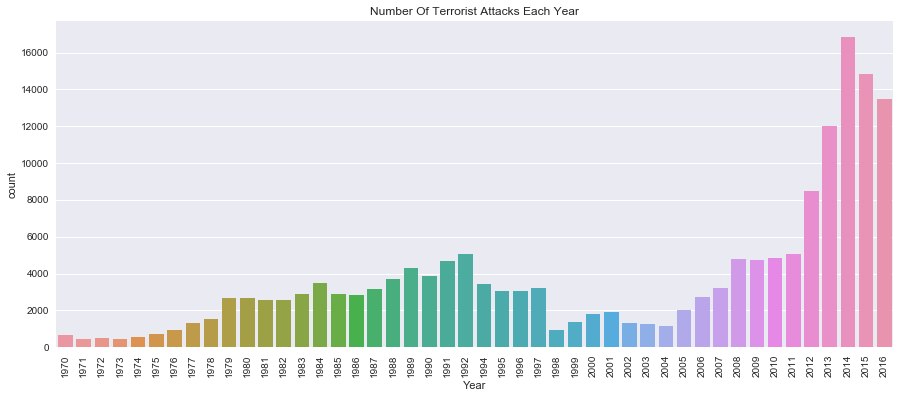

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

As we found before, 2014 was the worst year for terrorist attacks. Additionally, we can see that the number of terrorist attacks has, in general, increased over time. Particularly, since 2011.

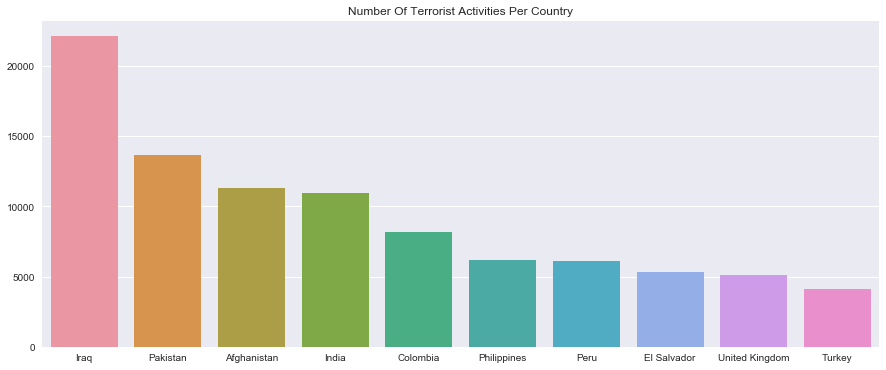

In [46]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:10].index,terror['Country'].value_counts()[:10].values)
#plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Per Country')
plt.show()

As before, Iraq is the worst affected country. This is followed by Pakistan and then Afghanistan. Clearly, this region has been deeply affected by terrorism.

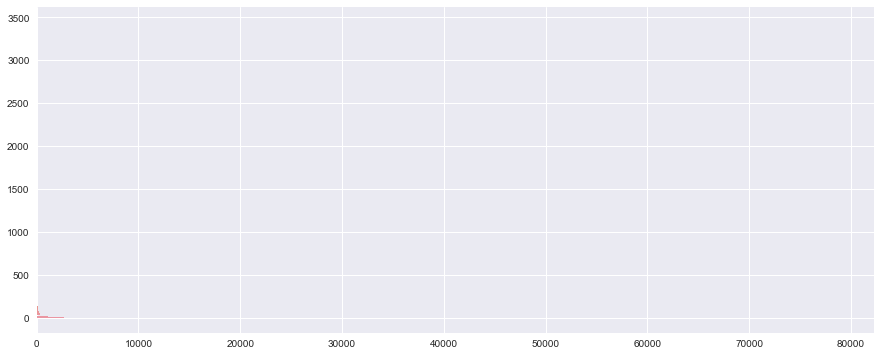

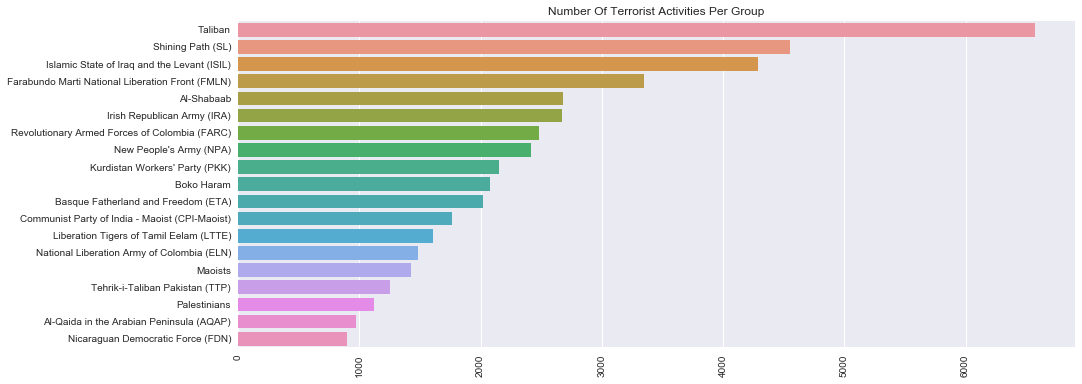

In [77]:
plt.subplots(figsize=(15,6))
sns.barplot(y=terror['Group'].value_counts()[1:20].index,x=terror['Group'].value_counts()[1:20].values)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Per Group')
plt.show()

We can see that the Taliban is the worst group, followed by Shining Path and ISIL. 

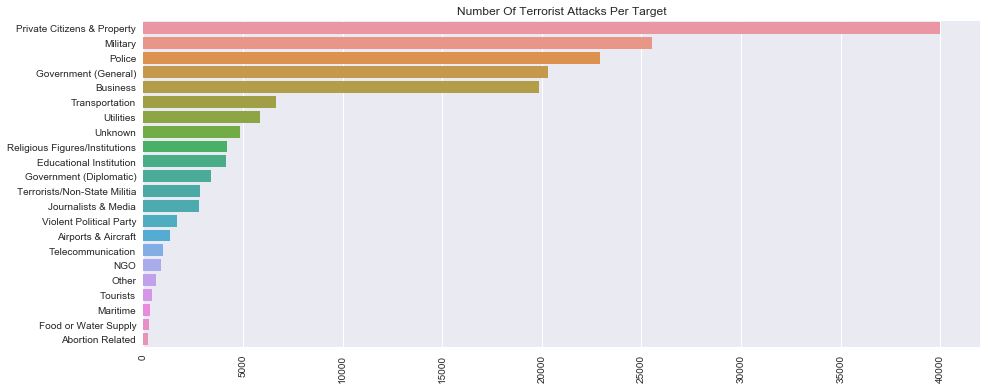

In [74]:
plt.subplots(figsize=(15,6))
sns.barplot(y=terror['Target_type'].value_counts().index,x=terror['Target_type'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Per Target')
plt.show()

An overwhelming number of attacks occur on private citizens and proprety. This is followed by the military, police, government and then business.

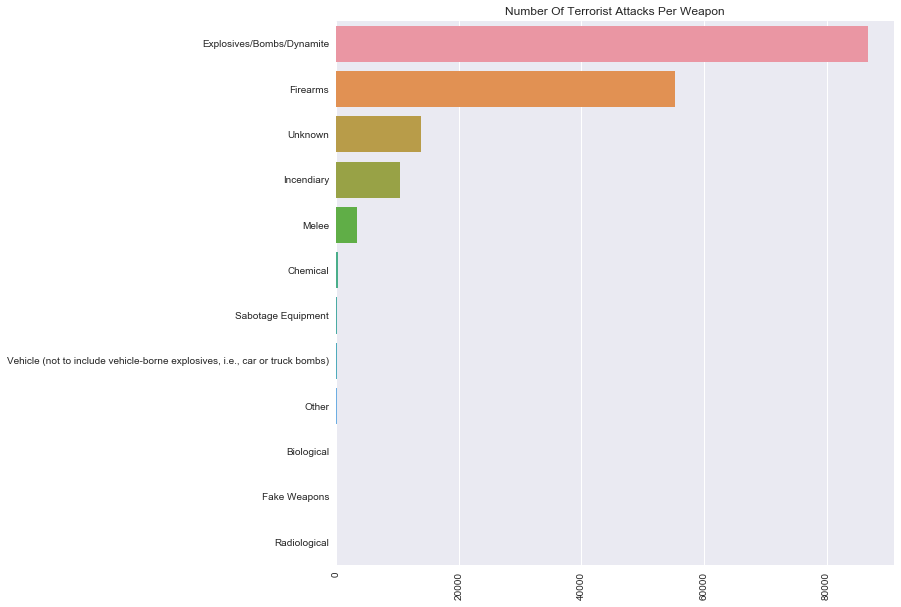

In [75]:
plt.subplots(figsize=(10,10))
sns.barplot(y=terror['Weapon_type'].value_counts().index,x=terror['Weapon_type'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Per Weapon')
plt.show()

A terrorists weapon of choice is an explosive of some form. This is followed by firearms. 

## 2. Geography of Terrorism
Let us now have a look at terrorism across the globe.

### 2.1 Global Terrorism